In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_excel("combined.xlsx")
df.describe()

,epoch,neurons,training time for ELM,testing time per image,precision,recall,f1 score,accuracy,sensitivity,specificity,false positive rate
count,66.000000,66.000000,66.000000,58.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,24.848485,286.363636,4.156880,2.335436,0.741424,0.955727,0.834991,0.811631,0.955727,0.668560,0.330036
std,11.127571,127.262737,1.372137,0.414942,0.022676,0.019480,0.021165,0.025327,0.019480,0.033478,0.033193
min,10.000000,100.000000,2.472322,1.673210,0.694678,0.902500,0.785466,0.754380,0.902500,0.594903,0.264604
25%,20.000000,200.000000,3.214390,1.993732,0.724554,0.943708,0.822333,0.795400,0.943708,0.644961,0.305850
50%,20.000000,300.000000,3.937705,2.287088,0.743156,0.961667,0.838306,0.814373,0.961667,0.672514,0.327321
75%,30.000000,400.000000,4.678920,2.684075,0.757000,0.969125,0.850258,0.829258,0.969125,0.691916,0.351605
max,40.000000,500.000000,11.327227,3.228133,0.785791,0.981167,0.872479,0.857178,0.981167,0.735396,0.405097


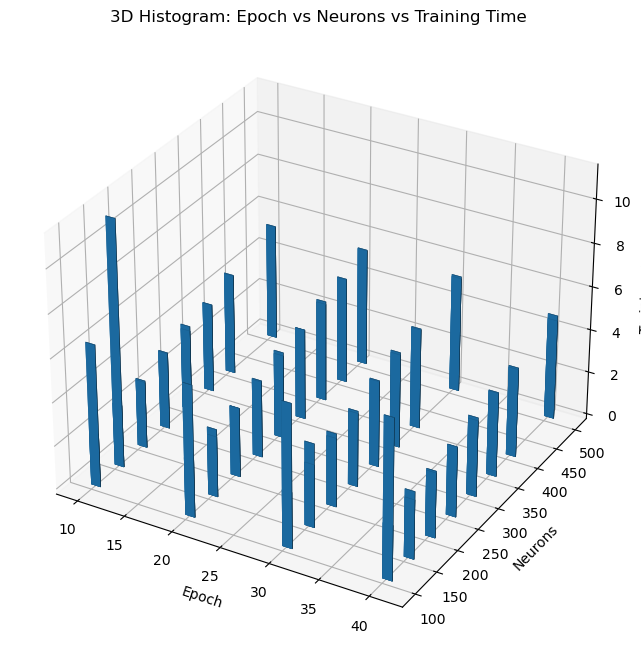

In [3]:

# # Convert necessary columns to the appropriate data types
df['epoch'] = df['epoch'].astype(int)
df['neurons'] = df['neurons'].astype(int)
df['training time for ELM'] = df['training time for ELM'].astype(float)

# Create the 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
hist = ax.bar3d(df['epoch'], df['neurons'], 0, 1, 1, df['training time for ELM'])

# Set labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Neurons')
ax.set_zlabel('Training Time')
ax.set_title('3D Histogram: Epoch vs Neurons vs Training Time')

# Show the plot
plt.show()

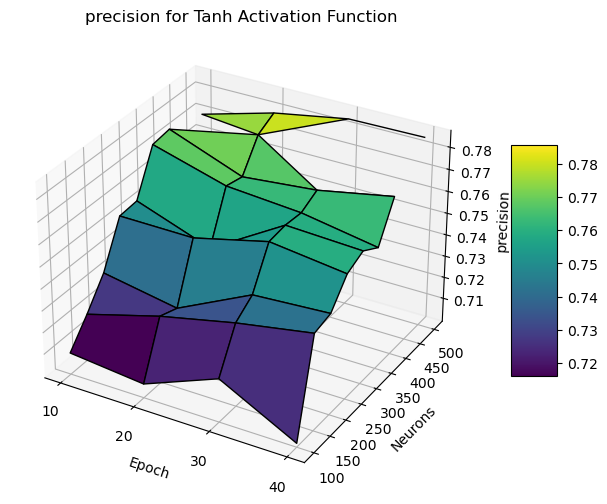

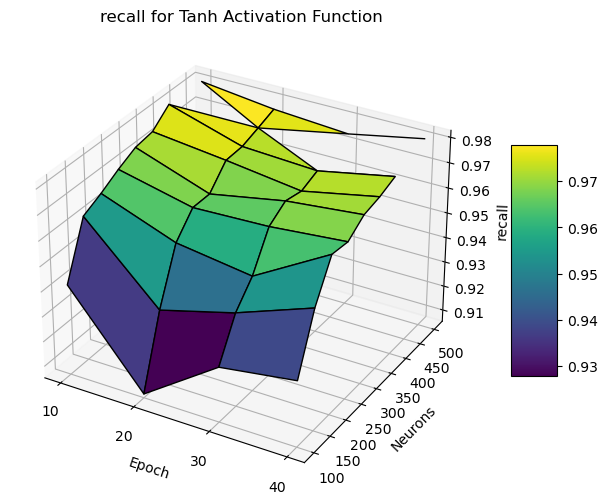

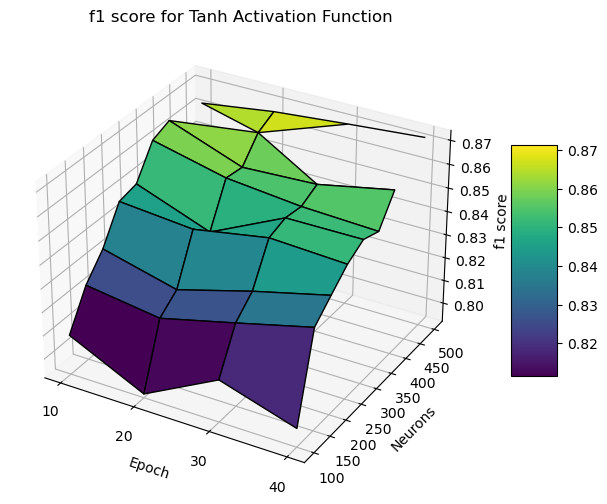

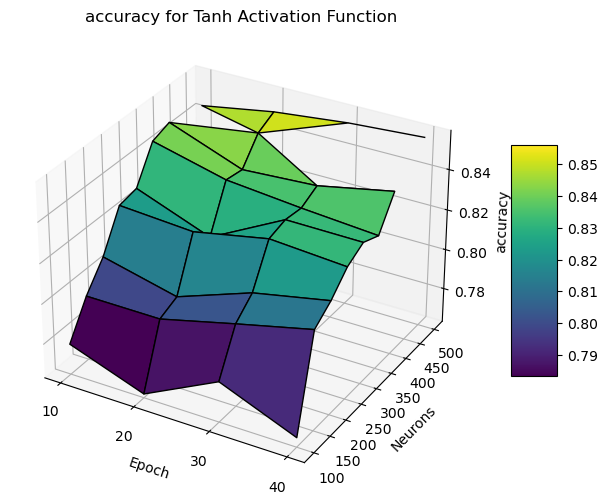

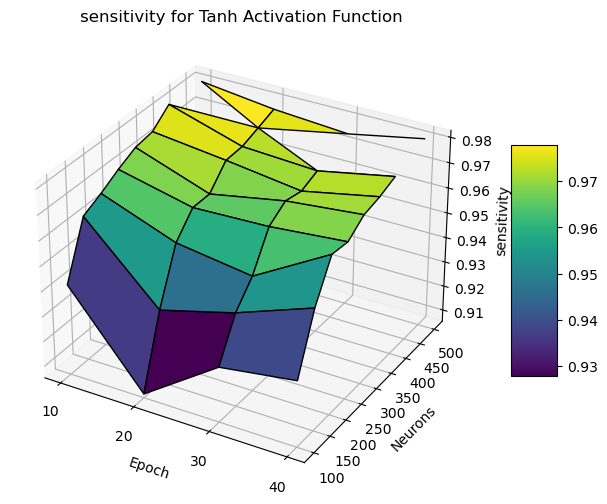

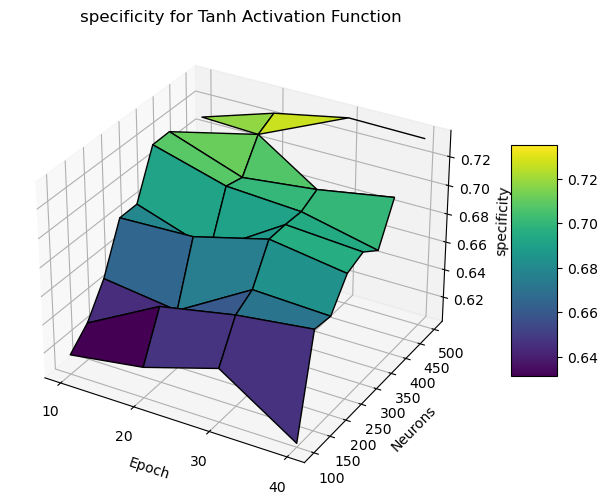

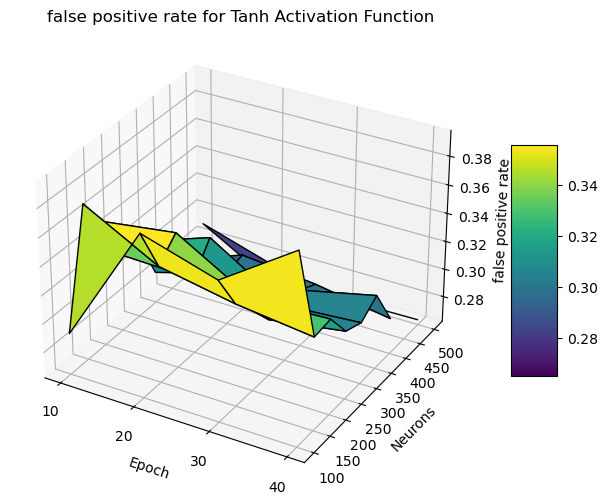

In [6]:
# Filter data for "tanh" activation function
df_tanh = df[df['activation'] == 'tanh']

# Define the performance metrics
performance_metrics = ['precision', 'recall', 'f1 score', 'accuracy', 'sensitivity', 'specificity', 'false positive rate']

# Create a separate surface plot for each performance metric
for metric in performance_metrics:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Generate meshgrid for epoch and neurons
    epochs = np.unique(df_tanh['epoch'])
    neurons = np.unique(df_tanh['neurons'])
    X, Y = np.meshgrid(epochs, neurons)

    # Extract performance values for each combination of epoch and neurons
    Z = []
    for neuron in neurons:
        row = []
        for epoch in epochs:
            value = df_tanh[(df_tanh['neurons'] == neuron) & (df_tanh['epoch'] == epoch)][metric].values
            row.append(value[0] if len(value) > 0 else np.nan)
        Z.append(row)

    # Convert Z to numpy array
    Z = np.array(Z)

    # Create surface plot
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Neurons')
    ax.set_zlabel(metric)
    ax.set_title(f'{metric} for Tanh Activation Function')
    ax.set_xticks(epochs)
    ax.set_yticks(neurons)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.show()


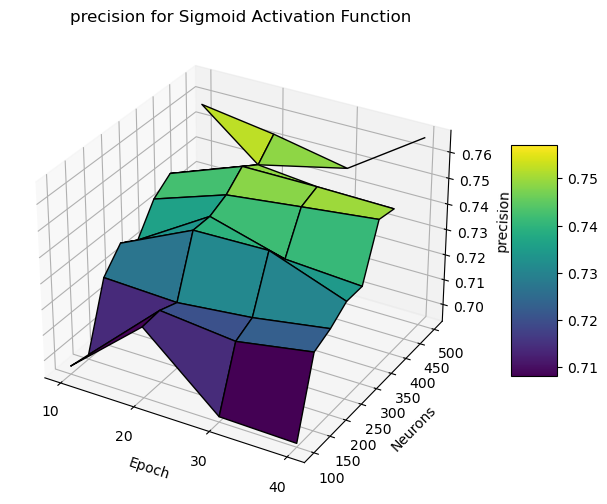

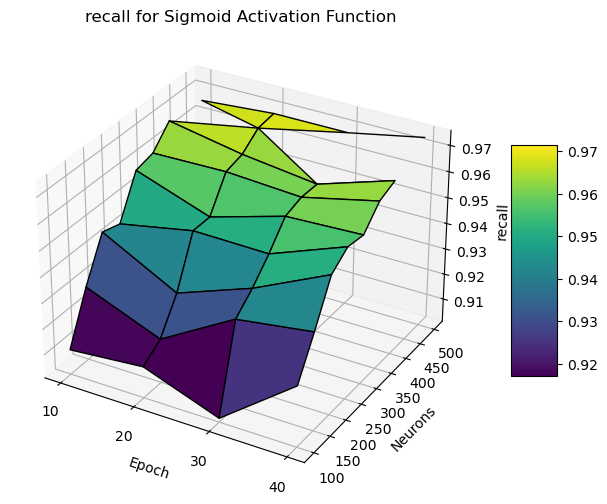

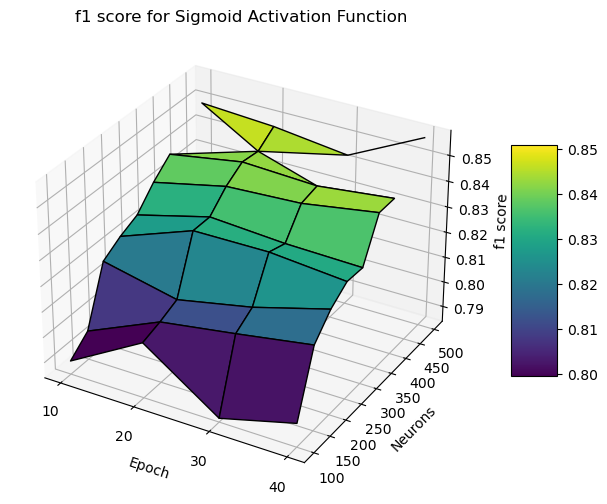

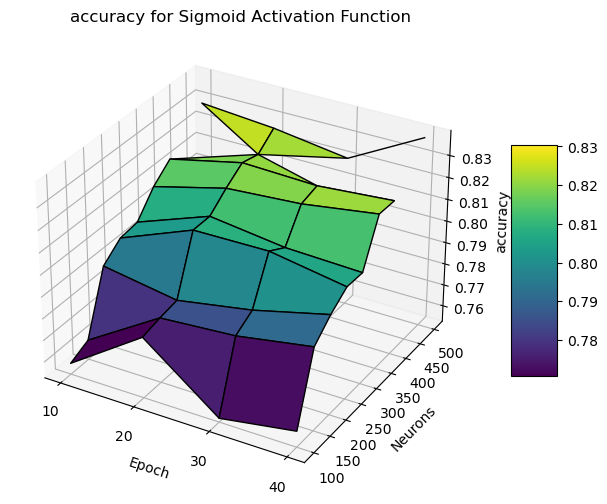

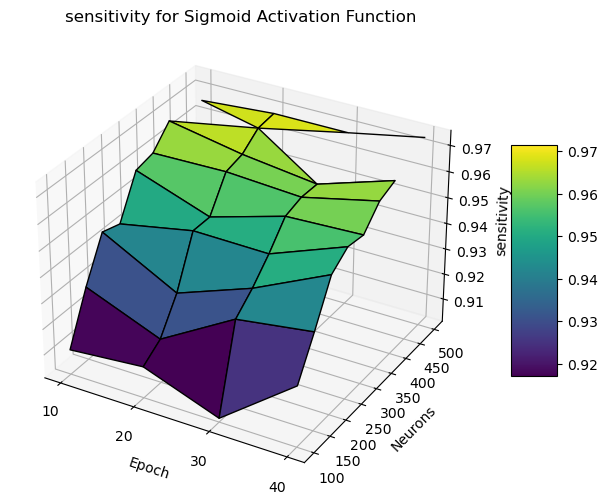

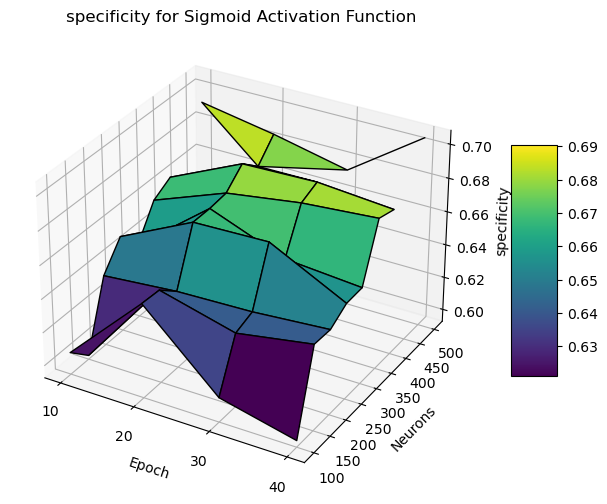

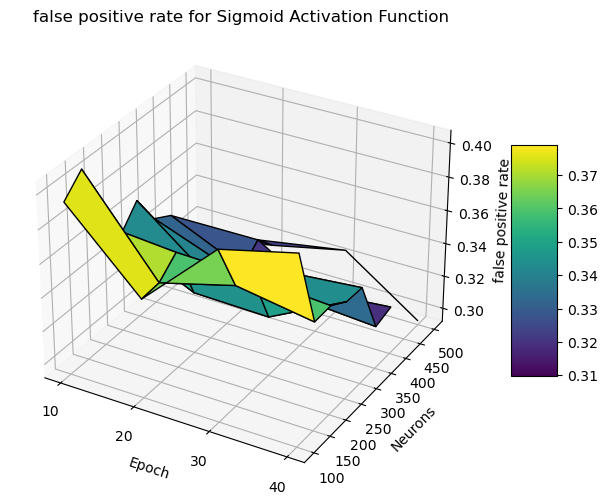

In [7]:
# Filter data for "sigm" activation function
df_sigm = df[df['activation'] == 'sigm']

# Define the performance metrics
performance_metrics = ['precision', 'recall', 'f1 score', 'accuracy', 'sensitivity', 'specificity', 'false positive rate']

# Create a separate surface plot for each performance metric
for metric in performance_metrics:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Generate meshgrid for epoch and neurons
    pochs = np.unique(df_tanh['epoch'])
    neurons = np.unique(df_sigm['neurons'])
    X, Y = np.meshgrid(epochs, neurons)

    # Extract performance values for each combination of epoch and neurons
    Z = []
    for neuron in neurons:
        row = []
        for epoch in epochs:
            value = df_sigm[(df_sigm['neurons'] == neuron) & (df_sigm['epoch'] == epoch)][metric].values
            row.append(value[0] if len(value) > 0 else np.nan)
        Z.append(row)

    # Convert Z to numpy array
    Z = np.array(Z)

    # Create surface plot
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Neurons')
    ax.set_zlabel(metric)
    ax.set_title(f'{metric} for Sigmoid Activation Function')
    ax.set_xticks(epochs)
    ax.set_yticks(neurons)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.show()
